In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from cosmos_tokenizer.image_lib import ImageTokenizer
from torchvision.transforms import ToTensor, Resize, ToPILImage

from PIL import Image

from huggingface_hub import snapshot_download

## Download Huggingface model

List of tokenizers for image in Discrete space:
   - "Cosmos-0.1-Tokenizer-DI8x8",
   - "Cosmos-0.1-Tokenizer-DI16x16",
   - "Cosmos-1.0-Tokenizer-DI8x8-LowRes",
   - "Cosmos-1.0-Tokenizer-DI16x16-LowRes",

In [11]:
model_name = "Cosmos-0.1-Tokenizer-DI8x8"
snapshot_download(repo_id=f"nvidia/{model_name}", local_dir=f"checkpoints/{model_name}")
# Question: How do we do do we load the tokenizer and save it in tmp and so we redownload it every time or we do save it in the repo ? / in a personnal local cache ?

Fetching 7 files: 100%|██████████| 7/7 [00:36<00:00,  5.23s/it]


'/Users/adrienbousquie/Documents/EPFL/ComProject/SAGA_COM-304/dataset_module/src/checkpoints/Cosmos-0.1-Tokenizer-DI8x8'

## See and Load the image

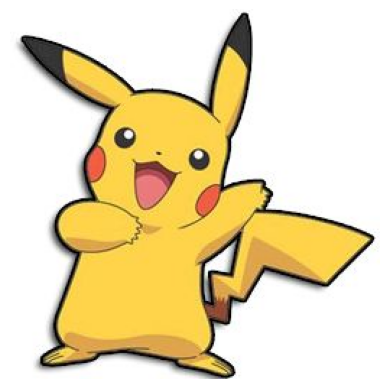

In [12]:
image = Image.open('test.jpg').convert('RGB')
image = Resize((256, 256))(image) # Question: Is it necessary as normally already done ?

# Convert the image to a NumPy array (optional, for processing)
image_array = np.array(image)

# Plot the image
plt.imshow(image_array)
plt.axis('off')  # Turn off axis labels
plt.show()

In [13]:
# Add a batch dimension
input_tensor = ToTensor()(image).unsqueeze(0)
encoder = ImageTokenizer(checkpoint_enc=f'checkpoints/{model_name}/encoder.jit')
(latent,) = encoder.encode(input_tensor)
latent.shape

AttributeError: module 'torch.mps' has no attribute 'current_device'